   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 46.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 29.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: es (Spanish) ...


INFO:stanza:Downloaded file to /root/stanza_resources/es/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: es (Spanish):
| Processor    | Package           |
------------------------------------
| tokenize     | combined          |
| mwt          | combined          |
| pos          | combined_charlm   |
| lemma        | combined_nocharlm |
| constituency | combined_charlm   |
| depparse     | combined_charlm   |
| sentiment    | tass2020_charlm   |
| ner          | conll02           |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: mwt
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: constituency
INFO:stanza:Loading: depparse
INFO:stanza:Loading: sentiment
INFO:stanza:Loading: ner
INFO:stanza:Done loading processors!


╒════╤══════════╤══════════╤══════════╕
│    │ Word     │ Lemma    │ POS      │
╞════╪══════════╪══════════╪══════════╡
│  0 │ La       │ el       │ da0fs0   │
├────┼──────────┼──────────┼──────────┤
│  1 │ ciencia  │ ciencia  │ ncfs000  │
├────┼──────────┼──────────┼──────────┤
│  2 │ no       │ no       │ rn       │
├────┼──────────┼──────────┼──────────┤
│  3 │ es       │ ser      │ vsip3s0  │
├────┼──────────┼──────────┼──────────┤
│  4 │ la       │ el       │ da0fs0   │
├────┼──────────┼──────────┼──────────┤
│  5 │ verdad   │ verdad   │ ncfs000  │
├────┼──────────┼──────────┼──────────┤
│  6 │ .        │ .        │ fp       │
├────┼──────────┼──────────┼──────────┤
│  7 │ La       │ el       │ da0fs0   │
├────┼──────────┼──────────┼──────────┤
│  8 │ ciencia  │ ciencia  │ ncfs000  │
├────┼──────────┼──────────┼──────────┤
│  9 │ busca    │ buscar   │ vmip3s0  │
├────┼──────────┼──────────┼──────────┤
│ 10 │ la       │ el       │ da0fs0   │
├────┼──────────┼──────────┼──────────┤


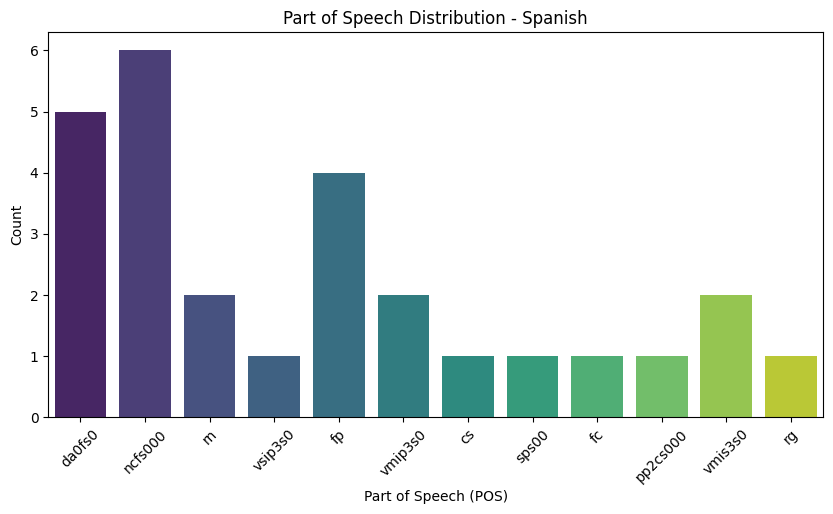

In [2]:
!pip install stanza
import stanza
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

# Download and load the Spanish Stanza pipeline
stanza.download("es")
nlp_es = stanza.Pipeline("es")

sentence_es = "La ciencia no es la verdad. La ciencia busca la verdad. Cuando la ciencia cambia de opinión, no te mintió. Aprendió más."
doc_es = nlp_es(sentence_es)

# Extracting words, lemmas, and POS
results_es = [[word.text, word.lemma, word.xpos] for sentence in doc_es.sentences for word in sentence.words]

df_es = pd.DataFrame(results_es, columns=["Word", "Lemma", "POS"])

# Print the table
print(tabulate(df_es, headers="keys", tablefmt="fancy_grid"))

# Plot POS distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=df_es, x="POS", hue="POS", palette="viridis", legend=False)
plt.title("Part of Speech Distribution - Spanish")
plt.xticks(rotation=45)
plt.xlabel("Part of Speech (POS)")
plt.ylabel("Count")
plt.show()
